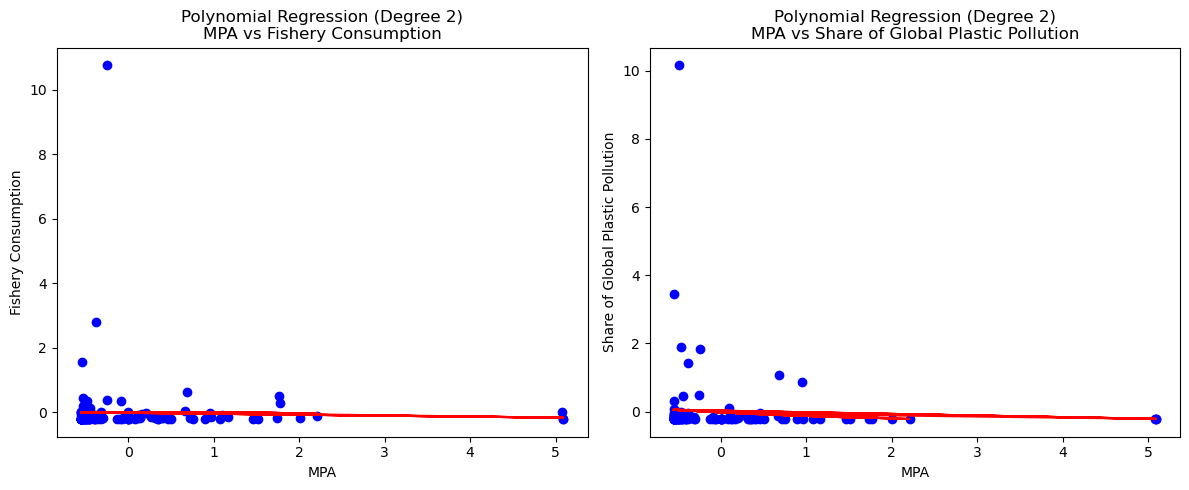

R-squared for MPA and Fishery Consumption: 0.0006382085126342973
R-squared for MPA and Share of Global Plastic Pollution: 0.005885140169289982
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                   0.04087
Date:                Fri, 02 Aug 2024   Prob (F-statistic):              0.960
Time:                        16:02:19   Log-Likelihood:                -185.84
No. Observations:                 131   AIC:                             377.7
Df Residuals:                     128   BIC:                             386.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

# Load your dataset
data = pd.read_csv('input-std.csv')

# Extract relevant columns
mpa = data['MPA'].values
fishery_consumption = data['FisheryConsumption'].values
plastic_pollution = data['Share of global plastics emitted to ocean'].values

# Polynomial regression function
def polynomial_regression(x, y, degree):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x.reshape(-1, 1))
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    return y_poly_pred, model, polynomial_features

# Fit polynomial regression for MPA and Fishery Consumption
degree = 2  # You can try higher degrees as well
y_poly_pred_fishery, model_fishery, poly_features_fishery = polynomial_regression(mpa, fishery_consumption, degree)

# Fit polynomial regression for MPA and Share of Global Plastic Pollution
y_poly_pred_plastic, model_plastic, poly_features_plastic = polynomial_regression(mpa, plastic_pollution, degree)

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(mpa, fishery_consumption, color='blue')
plt.plot(mpa, y_poly_pred_fishery, color='red')
plt.title('Polynomial Regression (Degree {})\nMPA vs Fishery Consumption'.format(degree))
plt.xlabel('MPA')
plt.ylabel('Fishery Consumption')

plt.subplot(1, 2, 2)
plt.scatter(mpa, plastic_pollution, color='blue')
plt.plot(mpa, y_poly_pred_plastic, color='red')
plt.title('Polynomial Regression (Degree {})\nMPA vs Share of Global Plastic Pollution'.format(degree))
plt.xlabel('MPA')
plt.ylabel('Share of Global Plastic Pollution')

plt.tight_layout()
plt.show()

# Evaluate models using R-squared
r2_fishery = r2_score(fishery_consumption, y_poly_pred_fishery)
r2_plastic = r2_score(plastic_pollution, y_poly_pred_plastic)

print(f"R-squared for MPA and Fishery Consumption: {r2_fishery}")
print(f"R-squared for MPA and Share of Global Plastic Pollution: {r2_plastic}")

# Fit polynomial regression for MPA and Fishery Consumption using statsmodels
X_poly_fishery = sm.add_constant(poly_features_fishery.fit_transform(mpa.reshape(-1, 1)))
model_fishery_stats = sm.OLS(fishery_consumption, X_poly_fishery).fit()

# Fit polynomial regression for MPA and Share of Global Plastic Pollution using statsmodels
X_poly_plastic = sm.add_constant(poly_features_plastic.fit_transform(mpa.reshape(-1, 1)))
model_plastic_stats = sm.OLS(plastic_pollution, X_poly_plastic).fit()

# Print model summaries
print(model_fishery_stats.summary())
print(model_plastic_stats.summary())

